# Time Series Visualizer

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

In [60]:
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [144]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df.index = pd.to_datetime(df.index)

Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [88]:
# Clean data
df = df[
    (df['value'] > df['value'].quantile(0.025)) &
    (df['value'] < df['value'].quantile(0.975))
]
df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".


In [ ]:
plt.figure(figsize=(24,6))
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016 - 12/2019')

plt.plot(df.index, df.value);

Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".

In [142]:
months = {
    1:'January',
    2:'February',
    3:'March',
    4:'April',
    5:'May',
    6:'June',
    7:'July',
    8:'August',
    9:'September',
    10:'October',
    11:'November',
    12:'December'
}
hue_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [135]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['Years'] = df.index.year
df_bar['Months'] = df.index.month.map(months)
df_bar = df_bar.groupby(['Years','Months'], as_index=False)['value'].mean()

Text(0.5, 0, 'Years')

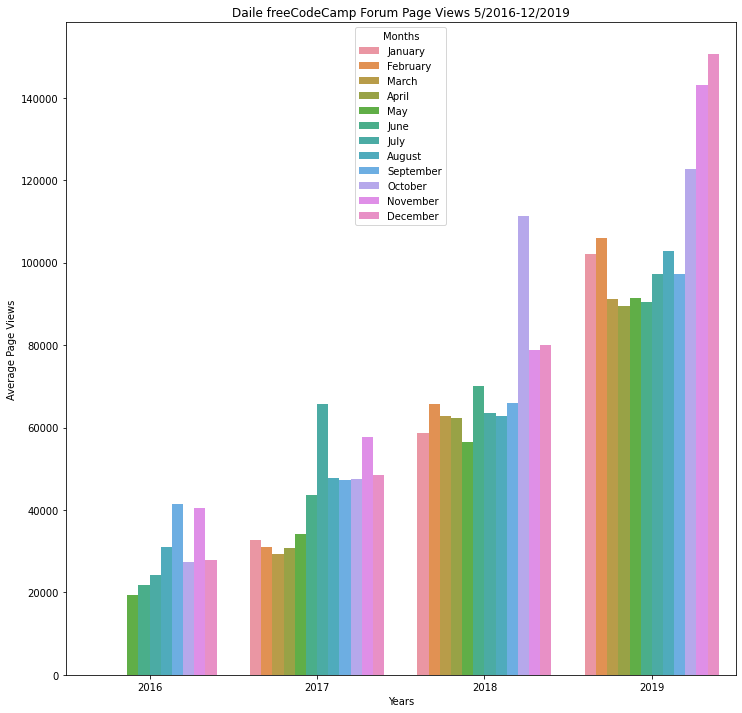

In [143]:
# Draw bar plot
plt.figure(figsize=(12,12))
sns.barplot(data=df_bar, x='Years', y='value', hue='Months', hue_order=hue_order)
plt.title('Daile freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.ylabel('Average Page Views')
plt.xlabel('Years')

Create a draw_box_plot function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

In [166]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-09,1201,2016,May
1,2016-05-10,2329,2016,May
2,2016-05-11,1716,2016,May
3,2016-05-12,10539,2016,May
4,2016-05-13,6933,2016,May
...,...,...,...,...
1299,2019-11-29,171584,2019,Nov
1300,2019-11-30,141161,2019,Nov
1301,2019-12-01,142918,2019,Dec
1302,2019-12-02,220144,2019,Dec


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality')]

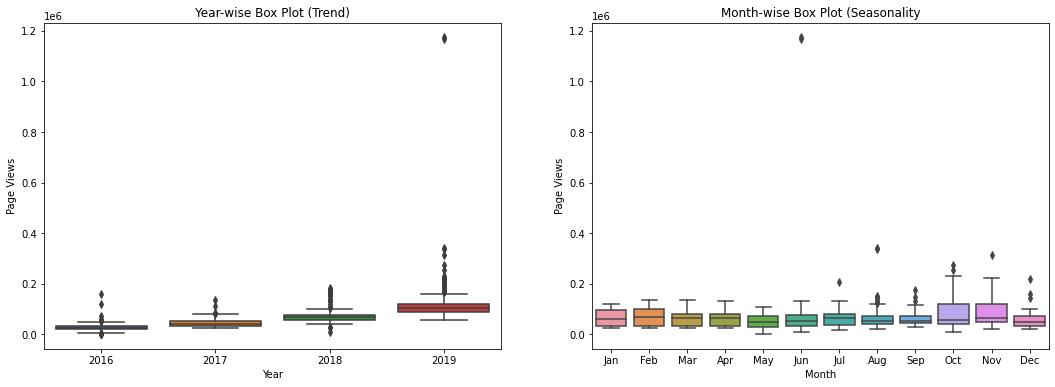

In [169]:
# Draw box plots (using Seaborn)
fig, axes = plt.subplots(1,2, figsize=(18,6))
ax1 = axes[0]
sns.boxplot(data=df_box, x='year', y='value', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')
ax1.set_title('Year-wise Box Plot (Trend)')

ax2 = axes[1]
sns.boxplot(data=df_box, x='month', y='value', ax=ax2, order=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
ax2.set(xlabel='Month', ylabel='Page Views', title='Month-wise Box Plot (Seasonality)')